In [1]:
import warnings; warnings.simplefilter('ignore')

import numpy as np
import sys
sys.path.append('./ckplotlib/')
import map_funcs
from IPython.display import Image
#
import netCDF4 as nc4
import smoothlib
import geog_funcs

years_tomap_start = 120
years_tomap_end = 150



1.6.1


requested fields
Variable (analysis);  CMIP6 CMOR name / ESGF archive name
- YEAR
- ST (degree Celsius); tas - 273.15
- CO2 (ppm); co2, It will be similar in all models but likely not exactly the same despite they are all 1pctCO2 runs.
- Land-atmosphere CO2 flux (Pg C/yr); netAtmosLandCO2Flux (converted from kg CO2 m-2 s-1 to PgC/yr)
- Ocean-atmosphere CO2 flux (Pg C/yr); FGCO2 (converted from kg CO2 m-2 s-1 to PgC/yr) 
- GPP (Pg C/yr); Gpp
- NPP (Pg C/yr); Npp
- Heterotrophic respiration, HETRES or Rh (Pg C/yr); rh = rhSoil+rhLitter
- Live vegetation biomass, CLIVE or Cv (Pg C); cVeg
- Dead biomass on land, CDEAD or Cs  (Pg C); cSoil + cLitter


In [2]:
## load the native lnd/atm map grid files
area_file = nc4.Dataset('areacella_fx_CESM2_1pctCO2_r1i1p1f1_gn.nc')
area = area_file.variables['areacella'][:]
lat = area_file.variables['lat'][:]
lon = area_file.variables['lon'][:]

JM = len(lat)
IM = len(lon)

## load the native ocean map grid files
area_file_ocn_gn = nc4.Dataset('areacello_Ofx_CESM2_1pctCO2_r1i1p1f1_gn.nc')
area_ocn_gn = area_file_ocn_gn.variables['areacello'][:]
lat_ocn_gn = area_file_ocn_gn.variables['lat'][:]
lon_ocn_gn = area_file_ocn_gn.variables['lon'][:]

JM_ocn_gn = len(lat_ocn_gn)
IM_ocn_gn = len(lon_ocn_gn)

## load the modified ocean map grid files
area_file_ocn_gr = nc4.Dataset('areacello_Ofx_CESM2_1pctCO2_r1i1p1f1_gr.nc')
area_ocn_gr = area_file_ocn_gr.variables['areacello'][:]
lat_ocn_gr = area_file_ocn_gr.variables['lat'][:]
lon_ocn_gr = area_file_ocn_gr.variables['lon'][:]

JM_ocn_gr = len(lat_ocn_gr)
IM_ocn_gr = len(lon_ocn_gr)

## and the land and ice grids
sftlf_file = nc4.Dataset('sftlf_fx_CESM2_1pctCO2_r1i1p1f1_gn.nc')
sftlf = sftlf_file.variables['sftlf'][:]

sftgif_file = nc4.Dataset('sftgif_fx_CESM2_1pctCO2_r1i1p1f1_gn.nc')
sftgif = sftgif_file.variables['sftgif'][:]

area_landonly = area * (sftlf/100.) * (1. - sftgif/100.)



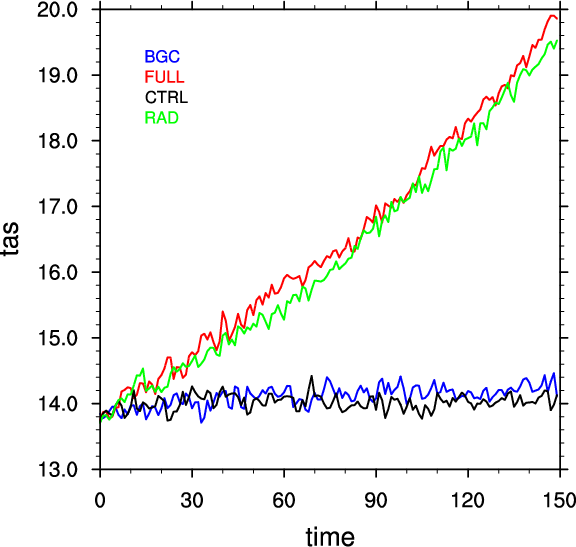

In [3]:
tasfilenames = [
['tas_Amon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_000101-005012.nc',
'tas_Amon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_005101-010012.nc',
'tas_Amon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_010101-015012.nc'],
['tas_Amon_CESM2_1pctCO2_r1i1p1f1_gn_000101-005012.nc',
'tas_Amon_CESM2_1pctCO2_r1i1p1f1_gn_005101-010012.nc',
'tas_Amon_CESM2_1pctCO2_r1i1p1f1_gn_010101-015012.nc'],
['tas_Amon_CESM2_piControl_r1i1p1f1_gn_050001-059912.nc',
'tas_Amon_CESM2_piControl_r1i1p1f1_gn_060001-069912.nc'],
['tas_Amon_CESM2_1pctco2-rad_r1i1p1f1_gn_000101-005012.nc',
'tas_Amon_CESM2_1pctco2-rad_r1i1p1f1_gn_005101-010012.nc',
'tas_Amon_CESM2_1pctco2-rad_r1i1p1f1_gn_010101-015012.nc']
]

tasfiles_bgc=[]
for i in range(len(tasfilenames[0])):
    tasfiles_bgc.append(nc4.Dataset(tasfilenames[0][i]))

tasfiles_ful=[]
for i in range(len(tasfilenames[1])):
    tasfiles_ful.append(nc4.Dataset(tasfilenames[1][i]))

tasfiles_ctrl=[]
for i in range(len(tasfilenames[2])):
    tasfiles_ctrl.append(nc4.Dataset(tasfilenames[2][i]))

tasfiles_rad=[]
for i in range(len(tasfilenames[3])):
    tasfiles_rad.append(nc4.Dataset(tasfilenames[3][i]))


tas_bgc = np.ma.row_stack((tasfiles_bgc[0].variables['tas'][:],tasfiles_bgc[1].variables['tas'][:],tasfiles_bgc[2].variables['tas'][:]))- 273.15
tas_bgc_annual = smoothlib.monthly_to_annual(tas_bgc)
tas_bgc_global_annual = geog_funcs.area_average(tas_bgc_annual, lat, lon, area=area)

tas_ful = np.ma.row_stack((tasfiles_ful[0].variables['tas'][:],tasfiles_ful[1].variables['tas'][:],tasfiles_ful[2].variables['tas'][:]))- 273.15
tas_ful_annual = smoothlib.monthly_to_annual(tas_ful)
tas_ful_global_annual = geog_funcs.area_average(tas_ful_annual, lat, lon, area=area)

tas_ctrl = np.ma.row_stack((tasfiles_ctrl[0].variables['tas'][:],tasfiles_ctrl[1].variables['tas'][:]))- 273.15
tas_ctrl_annual = smoothlib.monthly_to_annual(tas_ctrl)
tas_ctrl_global_annual = geog_funcs.area_average(tas_ctrl_annual, lat, lon, area=area)

tas_rad = np.ma.row_stack((tasfiles_rad[0].variables['tas'][:],tasfiles_rad[1].variables['tas'][:],tasfiles_rad[2].variables['tas'][:]))- 273.15
tas_rad_annual = smoothlib.monthly_to_annual(tas_rad)
tas_rad_global_annual = geog_funcs.area_average(tas_rad_annual, lat, lon, area=area)

map_funcs.xyplot(np.arange(len(tas_ful_global_annual)), np.row_stack((tas_bgc_global_annual,tas_ful_global_annual,tas_ctrl_global_annual[0:150],tas_rad_global_annual)), file='c4mip_tas_global', ytitle='tas', xtitle='time', showjupyter=True, colors=['blue','red','black','green'], labels=['BGC','FULL','CTRL','RAD'])

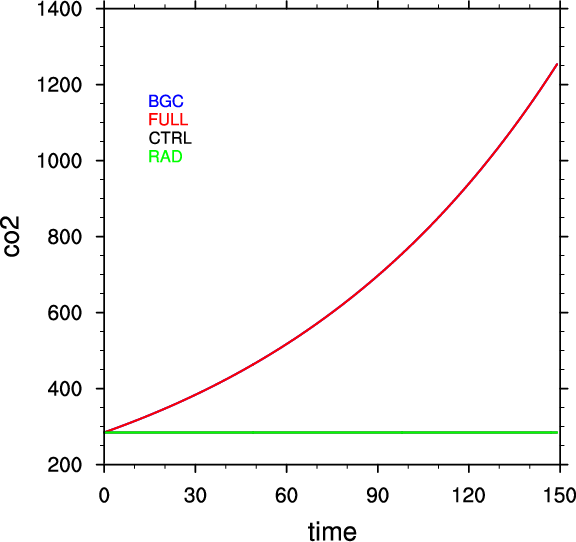

In [4]:
##co2filenames = [
##['co2_Amon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_000101-005012.nc',
##'co2_Amon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_005101-010012.nc',
##'co2_Amon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_010101-015012.nc'],
##['co2_Amon_CESM2_1pctCO2_r1i1p1f1_gn_000101-005012.nc',
##'co2_Amon_CESM2_1pctCO2_r1i1p1f1_gn_005101-010012.nc',
##'co2_Amon_CESM2_1pctCO2_r1i1p1f1_gn_010101-015012.nc'],
##['co2_Amon_CESM2_piControl_r1i1p1f1_gn_050001-059912.nc',
##'co2_Amon_CESM2_piControl_r1i1p1f1_gn_060001-069912.nc']
##]
##
##co2files_bgc=[]
##for i in range(len(co2filenames[0])):
##    co2files_bgc.append(nc4.Dataset(co2filenames[0][i]))
##
##co2files_ful=[]
##for i in range(len(co2filenames[1])):
##    co2files_ful.append(nc4.Dataset(co2filenames[1][i]))
##
##co2files_ctrl=[]
##for i in range(len(co2filenames[2])):
##    co2files_ctrl.append(nc4.Dataset(co2filenames[2][i]))
##
##
##co2_bgc = np.ma.row_stack((co2files_bgc[0].variables['co2'][:,0,:,:],co2files_bgc[1].variables['co2'][:,0,:,:],co2files_bgc[2].variables['co2'][:,0,:,:])) * 1e6
##co2_bgc_annual = smoothlib.monthly_to_annual(co2_bgc)
##co2_bgc_global_annual = geog_funcs.area_average(co2_bgc_annual, lat, lon, area=area)
##
##co2_ful = np.ma.row_stack((co2files_ful[0].variables['co2'][:,0,:,:],co2files_ful[1].variables['co2'][:,0,:,:],co2files_ful[2].variables['co2'][:,0,:,:]))  * 1e6
##co2_ful_annual = smoothlib.monthly_to_annual(co2_ful)
##co2_ful_global_annual = geog_funcs.area_average(co2_ful_annual, lat, lon, area=area)
##
##co2_ctrl = np.ma.row_stack((co2files_ctrl[0].variables['co2'][:,0,:,:],co2files_ctrl[1].variables['co2'][:,0,:,:]))  * 1e6
##co2_ctrl_annual = smoothlib.monthly_to_annual(co2_ctrl)
##co2_ctrl_global_annual = geog_funcs.area_average(co2_ctrl_annual, lat, lon, area=area)
##

## don't actually read the co2 concentrations from CAM, as they are irrelevent to the simulation.  instead just compute the forced values
## co2_1850 = 284.3  ## from Meinshausen GMD 2017 GHG protocol paper
co2_1850 = 284.7  ## CESM used the CMIP5 rather than the CMIP6 value
co2_bgc_global_annual = co2_1850 * 1.01 ** np.arange(150)
co2_ful_global_annual = co2_1850 * 1.01 ** np.arange(150)
co2_ctrl_global_annual= co2_1850 * 1.0 ** np.arange(150)
co2_rad_global_annual= co2_1850 * 1.0 ** np.arange(150)

map_funcs.xyplot(np.arange(len(co2_ful_global_annual)), np.row_stack((co2_bgc_global_annual,co2_ful_global_annual,co2_ctrl_global_annual[0:150],co2_rad_global_annual)), file='c4mip_co2_global', ytitle='co2', xtitle='time', showjupyter=True, colors=['blue','red','black','green'], labels=['BGC','FULL','CTRL','RAD'])



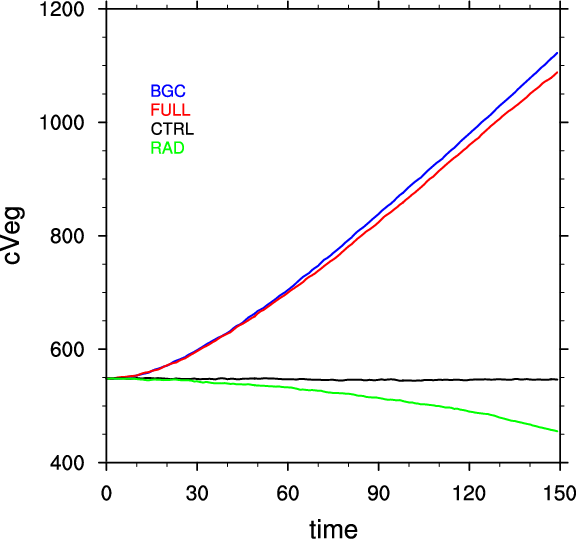

In [5]:
cVegfilenames = [
['cVeg_Lmon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_000101-005012.nc',
'cVeg_Lmon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_005101-010012.nc',
'cVeg_Lmon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_010101-015012.nc'],
['cVeg_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_000101-005012.nc',
'cVeg_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_005101-010012.nc',
'cVeg_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_010101-015012.nc'],
['cVeg_Lmon_CESM2_piControl_r1i1p1f1_gn_050001-059912.nc',
'cVeg_Lmon_CESM2_piControl_r1i1p1f1_gn_060001-069912.nc'],
['cVeg_Lmon_CESM2_1pctco2-rad_r1i1p1f1_gn_000101-005012.nc',
'cVeg_Lmon_CESM2_1pctco2-rad_r1i1p1f1_gn_005101-010012.nc',
'cVeg_Lmon_CESM2_1pctco2-rad_r1i1p1f1_gn_010101-015012.nc']

]

cVegfiles_bgc=[]
for i in range(len(cVegfilenames[0])):
    cVegfiles_bgc.append(nc4.Dataset(cVegfilenames[0][i]))

cVegfiles_ful=[]
for i in range(len(cVegfilenames[1])):
    cVegfiles_ful.append(nc4.Dataset(cVegfilenames[1][i]))

cVegfiles_ctrl=[]
for i in range(len(cVegfilenames[2])):
    cVegfiles_ctrl.append(nc4.Dataset(cVegfilenames[2][i]))

cVegfiles_rad=[]
for i in range(len(cVegfilenames[3])):
    cVegfiles_rad.append(nc4.Dataset(cVegfilenames[3][i]))

cVeg_bgc = np.ma.row_stack((cVegfiles_bgc[0].variables['cVeg'][:],cVegfiles_bgc[1].variables['cVeg'][:],cVegfiles_bgc[2].variables['cVeg'][:]))
cVeg_bgc_annual = smoothlib.monthly_to_annual(cVeg_bgc)
cVeg_bgc_global_annual = geog_funcs.area_integrate(cVeg_bgc_annual, lat, lon, area=area_landonly)  / 1e12

cVeg_ful = np.ma.row_stack((cVegfiles_ful[0].variables['cVeg'][:],cVegfiles_ful[1].variables['cVeg'][:],cVegfiles_ful[2].variables['cVeg'][:]))
cVeg_ful_annual = smoothlib.monthly_to_annual(cVeg_ful)
cVeg_ful_global_annual = geog_funcs.area_integrate(cVeg_ful_annual, lat, lon, area=area_landonly) / 1e12

cVeg_rad = np.ma.row_stack((cVegfiles_rad[0].variables['cVeg'][:],cVegfiles_rad[1].variables['cVeg'][:],cVegfiles_rad[2].variables['cVeg'][:]))
cVeg_rad_annual = smoothlib.monthly_to_annual(cVeg_rad)
cVeg_rad_global_annual = geog_funcs.area_integrate(cVeg_rad_annual, lat, lon, area=area_landonly) / 1e12

cVeg_ctrl = np.ma.row_stack((cVegfiles_ctrl[0].variables['cVeg'][:],cVegfiles_ctrl[1].variables['cVeg'][:]))
cVeg_ctrl_annual = smoothlib.monthly_to_annual(cVeg_ctrl)
cVeg_ctrl_global_annual = geog_funcs.area_integrate(cVeg_ctrl_annual, lat, lon, area=area_landonly) / 1e12

map_funcs.xyplot(np.arange(len(cVeg_ful_global_annual)), np.row_stack((cVeg_bgc_global_annual,cVeg_ful_global_annual,cVeg_ctrl_global_annual[0:150],cVeg_rad_global_annual)), file='c4mip_cVeg_global', ytitle='cVeg', xtitle='time', showjupyter=True, colors=['blue','red','black','green'], labels=['BGC','FULL','CTRL','RAD'])



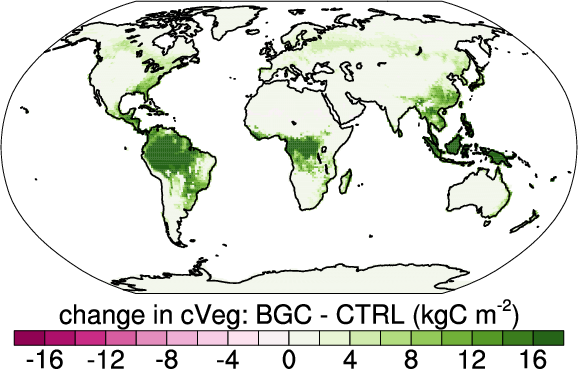

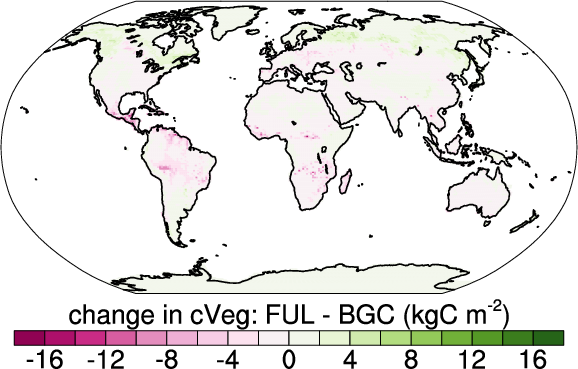

In [6]:
### make maps of the change in cVeg between (bgc - ctrl) and (ful - bgc)

map_funcs.fill(cVeg_bgc_annual[years_tomap_start:years_tomap_end,:,:].mean(axis=0)-cVeg_ctrl_annual[years_tomap_start:years_tomap_end,:,:].mean(axis=0), lat, lon, file='delta_cVeg_bgc_minus_ctrl', showjupyter=True, projection='Robinson', levels=np.arange(-16,18,2), colormap='MPL_PiYG', subtitle='change in cVeg: BGC - CTRL (kgC m~S~-2~N~)')

map_funcs.fill(cVeg_ful_annual[years_tomap_start:years_tomap_end,:,:].mean(axis=0)-cVeg_bgc_annual[years_tomap_start:years_tomap_end,:,:].mean(axis=0), lat, lon, file='delta_cVeg_ful_minus_bgc', showjupyter=True, projection='Robinson', levels=np.arange(-16,18,2), colormap='MPL_PiYG', subtitle='change in cVeg: FUL - BGC (kgC m~S~-2~N~)')



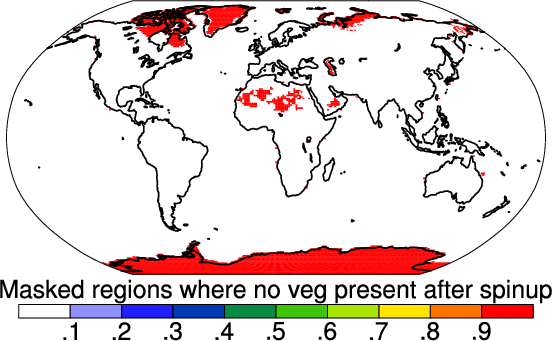

In [7]:
## create a mask whereby we only look at csoil in gridcells where cveg is greater than 0.
spinup_mask = cVeg_ctrl_annual[0,:,:] > 0.

area_landonly_vegpresent = area_landonly * spinup_mask

land_masks_for_plotting = 1.*(1.-spinup_mask)
map_funcs.fill(land_masks_for_plotting, lat, lon, file='noveg_mask', showjupyter=True, projection='Robinson',subtitle='Masked regions where no veg present after spinup')

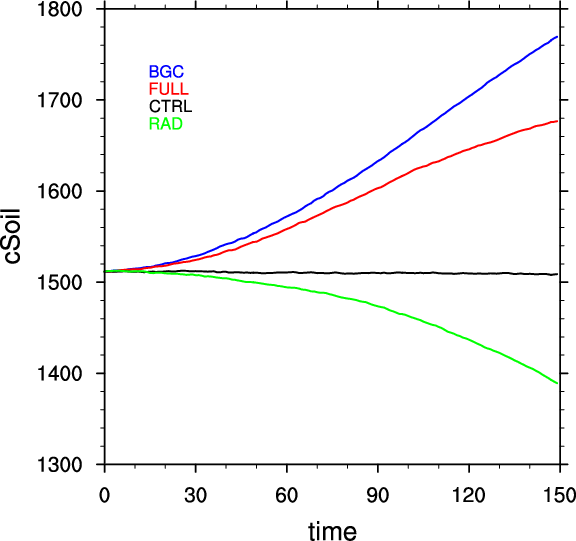

In [8]:
cSoilfilenames = [
['cSoil_Emon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_000101-005012.nc',
'cSoil_Emon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_005101-010012.nc',
'cSoil_Emon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_010101-015012.nc'],
['cSoil_Emon_CESM2_1pctCO2_r1i1p1f1_gn_000101-005012.nc',
'cSoil_Emon_CESM2_1pctCO2_r1i1p1f1_gn_005101-010012.nc',
'cSoil_Emon_CESM2_1pctCO2_r1i1p1f1_gn_010101-015012.nc'],
['cSoil_Emon_CESM2_piControl_r1i1p1f1_gn_050001-059912.nc',
'cSoil_Emon_CESM2_piControl_r1i1p1f1_gn_060001-069912.nc'],
['cSoil_Emon_CESM2_1pctco2-rad_r1i1p1f1_gn_000101-005012.nc',
'cSoil_Emon_CESM2_1pctco2-rad_r1i1p1f1_gn_005101-010012.nc',
'cSoil_Emon_CESM2_1pctco2-rad_r1i1p1f1_gn_010101-015012.nc']
]

cSoilfiles_bgc=[]
for i in range(len(cSoilfilenames[0])):
    cSoilfiles_bgc.append(nc4.Dataset(cSoilfilenames[0][i]))

cSoilfiles_ful=[]
for i in range(len(cSoilfilenames[1])):
    cSoilfiles_ful.append(nc4.Dataset(cSoilfilenames[1][i]))

cSoilfiles_ctrl=[]
for i in range(len(cSoilfilenames[2])):
    cSoilfiles_ctrl.append(nc4.Dataset(cSoilfilenames[2][i]))

cSoilfiles_rad=[]
for i in range(len(cSoilfilenames[3])):
    cSoilfiles_rad.append(nc4.Dataset(cSoilfilenames[3][i]))

cLitterfilenames = [
['cLitter_Lmon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_000101-005012.nc',
'cLitter_Lmon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_005101-010012.nc',
'cLitter_Lmon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_010101-015012.nc'],
['cLitter_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_000101-005012.nc',
'cLitter_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_005101-010012.nc',
'cLitter_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_010101-015012.nc'],
['cLitter_Lmon_CESM2_piControl_r1i1p1f1_gn_050001-059912.nc',
'cLitter_Lmon_CESM2_piControl_r1i1p1f1_gn_060001-069912.nc'],
['cLitter_Lmon_CESM2_1pctco2-rad_r1i1p1f1_gn_000101-005012.nc',
'cLitter_Lmon_CESM2_1pctco2-rad_r1i1p1f1_gn_005101-010012.nc',
'cLitter_Lmon_CESM2_1pctco2-rad_r1i1p1f1_gn_010101-015012.nc']
]

cLitterfiles_bgc=[]
for i in range(len(cLitterfilenames[0])):
    cLitterfiles_bgc.append(nc4.Dataset(cLitterfilenames[0][i]))

cLitterfiles_ful=[]
for i in range(len(cLitterfilenames[1])):
    cLitterfiles_ful.append(nc4.Dataset(cLitterfilenames[1][i]))

cLitterfiles_rad=[]
for i in range(len(cLitterfilenames[3])):
    cLitterfiles_rad.append(nc4.Dataset(cLitterfilenames[3][i]))

cLitterfiles_ctrl=[]
for i in range(len(cLitterfilenames[2])):
    cLitterfiles_ctrl.append(nc4.Dataset(cLitterfilenames[2][i]))

cCwdfilenames = [
['cLitterCwd_Emon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_000101-005012.nc',
'cLitterCwd_Emon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_005101-010012.nc',
'cLitterCwd_Emon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_010101-015012.nc'],
['cCwd_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_000101-005012.nc',
'cCwd_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_005101-010012.nc',
'cCwd_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_010101-015012.nc'],
['cCwd_Lmon_CESM2_piControl_r1i1p1f1_gn_050001-059912.nc',
'cCwd_Lmon_CESM2_piControl_r1i1p1f1_gn_060001-069912.nc'],
['cLitterCwd_Emon_CESM2_1pctco2-rad_r1i1p1f1_gn_000101-005012.nc',
'cLitterCwd_Emon_CESM2_1pctco2-rad_r1i1p1f1_gn_005101-010012.nc',
'cLitterCwd_Emon_CESM2_1pctco2-rad_r1i1p1f1_gn_010101-015012.nc']
]

cCwdfiles_bgc=[]
for i in range(len(cCwdfilenames[0])):
    cCwdfiles_bgc.append(nc4.Dataset(cCwdfilenames[0][i]))

cCwdfiles_ful=[]
for i in range(len(cCwdfilenames[1])):
    cCwdfiles_ful.append(nc4.Dataset(cCwdfilenames[1][i]))

cCwdfiles_rad=[]
for i in range(len(cCwdfilenames[3])):
    cCwdfiles_rad.append(nc4.Dataset(cCwdfilenames[3][i]))

cCwdfiles_ctrl=[]
for i in range(len(cCwdfilenames[2])):
    cCwdfiles_ctrl.append(nc4.Dataset(cCwdfilenames[2][i]))
    
cSoil_bgc = np.ma.row_stack((cSoilfiles_bgc[0].variables['cSoil'][:]+cLitterfiles_bgc[0].variables['cLitter'][:]+cCwdfiles_bgc[0].variables['cLitterCwd'][:],cSoilfiles_bgc[1].variables['cSoil'][:]+cLitterfiles_bgc[1].variables['cLitter'][:]+cCwdfiles_bgc[1].variables['cLitterCwd'][:],cSoilfiles_bgc[2].variables['cSoil'][:]+cLitterfiles_bgc[2].variables['cLitter'][:]+cCwdfiles_bgc[2].variables['cLitterCwd'][:]))
cSoil_bgc_annual = smoothlib.monthly_to_annual(cSoil_bgc)
cSoil_bgc_global_annual = geog_funcs.area_integrate(cSoil_bgc_annual, lat, lon, area=area_landonly_vegpresent)  / 1e12

cSoil_ful = np.ma.row_stack((cSoilfiles_ful[0].variables['cSoil'][:]+cLitterfiles_ful[0].variables['cLitter'][:]+cCwdfiles_ful[0].variables['cCwd'][:],cSoilfiles_ful[1].variables['cSoil'][:]+cLitterfiles_ful[1].variables['cLitter'][:]+cCwdfiles_ful[1].variables['cCwd'][:],cSoilfiles_ful[2].variables['cSoil'][:]+cLitterfiles_ful[2].variables['cLitter'][:]+cCwdfiles_ful[2].variables['cCwd'][:]))
cSoil_ful_annual = smoothlib.monthly_to_annual(cSoil_ful)
cSoil_ful_global_annual = geog_funcs.area_integrate(cSoil_ful_annual, lat, lon, area=area_landonly_vegpresent) / 1e12

cSoil_rad = np.ma.row_stack((cSoilfiles_rad[0].variables['cSoil'][:]+cLitterfiles_rad[0].variables['cLitter'][:]+cCwdfiles_rad[0].variables['cLitterCwd'][:],cSoilfiles_rad[1].variables['cSoil'][:]+cLitterfiles_rad[1].variables['cLitter'][:]+cCwdfiles_rad[1].variables['cLitterCwd'][:],cSoilfiles_rad[2].variables['cSoil'][:]+cLitterfiles_rad[2].variables['cLitter'][:]+cCwdfiles_rad[2].variables['cLitterCwd'][:]))
cSoil_rad_annual = smoothlib.monthly_to_annual(cSoil_rad)
cSoil_rad_global_annual = geog_funcs.area_integrate(cSoil_rad_annual, lat, lon, area=area_landonly_vegpresent) / 1e12

cSoil_ctrl = np.ma.row_stack((cSoilfiles_ctrl[0].variables['cSoil'][:]+cLitterfiles_ctrl[0].variables['cLitter'][:]+cCwdfiles_ctrl[0].variables['cCwd'][:],cSoilfiles_ctrl[1].variables['cSoil'][:]+cLitterfiles_ctrl[1].variables['cLitter'][:]+cCwdfiles_ctrl[1].variables['cCwd'][:]))
cSoil_ctrl_annual = smoothlib.monthly_to_annual(cSoil_ctrl)
cSoil_ctrl_global_annual = geog_funcs.area_integrate(cSoil_ctrl_annual, lat, lon, area=area_landonly_vegpresent) / 1e12

map_funcs.xyplot(np.arange(len(cSoil_ful_global_annual)), np.row_stack((cSoil_bgc_global_annual,cSoil_ful_global_annual,cSoil_ctrl_global_annual[0:150],cSoil_rad_global_annual)), file='c4mip_cSoil_global', ytitle='cSoil', xtitle='time', showjupyter=True, colors=['blue','red','black','green'], labels=['BGC','FULL','CTRL','RAD'])




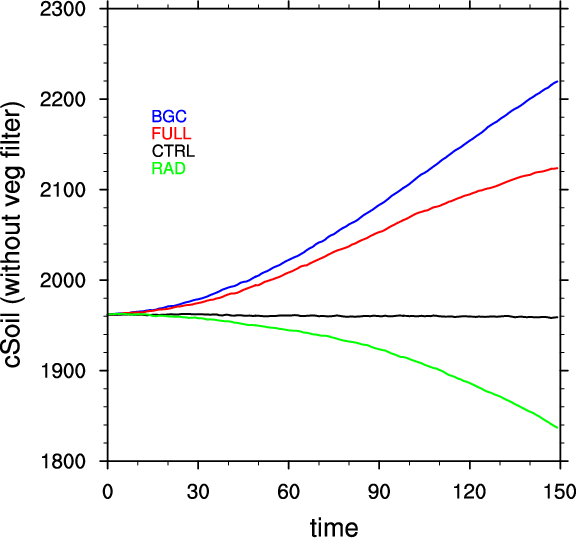

In [9]:
## plot the trajectory of global soil carbon, without using the vegetation filter

cSoil_bgc_global_annual_nofilter = geog_funcs.area_integrate(cSoil_bgc_annual, lat, lon, area=area_landonly)  / 1e12
cSoil_ful_global_annual_nofilter = geog_funcs.area_integrate(cSoil_ful_annual, lat, lon, area=area_landonly) / 1e12
cSoil_ctrl_global_annual_nofilter = geog_funcs.area_integrate(cSoil_ctrl_annual, lat, lon, area=area_landonly) / 1e12
cSoil_rad_global_annual_nofilter = geog_funcs.area_integrate(cSoil_rad_annual, lat, lon, area=area_landonly) / 1e12

map_funcs.xyplot(np.arange(len(cSoil_ful_global_annual)), np.row_stack((cSoil_bgc_global_annual_nofilter,cSoil_ful_global_annual_nofilter,cSoil_ctrl_global_annual_nofilter[0:150],cSoil_rad_global_annual_nofilter)), file='c4mip_cSoil_global_nofilter', ytitle='cSoil (without veg filter)', xtitle='time', showjupyter=True, colors=['blue','red','black','green'], labels=['BGC','FULL','CTRL','RAD'])


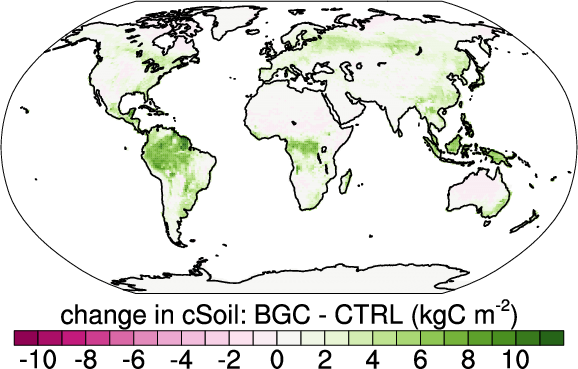

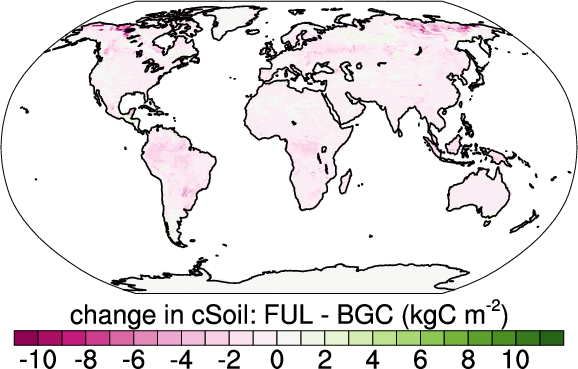

In [10]:
### make maps of the change in cSoil between (bgc - ctrl) and (ful - bgc)

map_funcs.fill(cSoil_bgc_annual[years_tomap_start:years_tomap_end,:,:].mean(axis=0)-cSoil_ctrl_annual[years_tomap_start:years_tomap_end,:,:].mean(axis=0), lat, lon, file='delta_cSoil_bgc_minus_ctrl', showjupyter=True, projection='Robinson', levels=np.arange(-10,12,1), colormap='MPL_PiYG', subtitle='change in cSoil: BGC - CTRL (kgC m~S~-2~N~)')

map_funcs.fill(cSoil_ful_annual[years_tomap_start:years_tomap_end,:,:].mean(axis=0)-cSoil_bgc_annual[years_tomap_start:years_tomap_end,:,:].mean(axis=0), lat, lon, file='delta_cSoil_ful_minus_bgc', showjupyter=True, projection='Robinson', levels=np.arange(-10,12,1), colormap='MPL_PiYG', subtitle='change in cSoil: FUL - BGC (kgC m~S~-2~N~)')


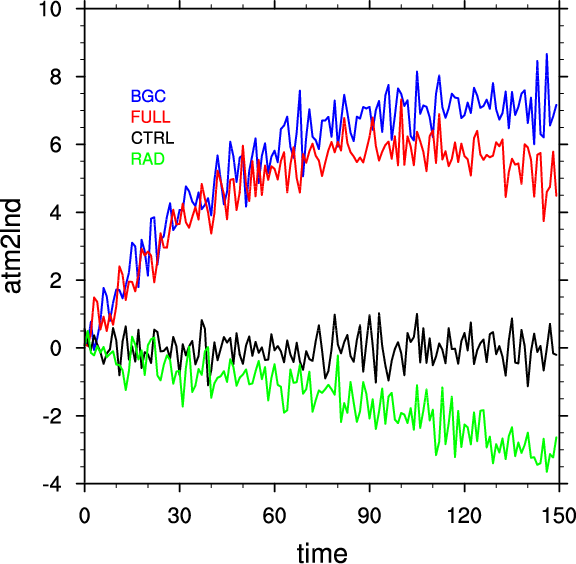

In [11]:
atm2lndfilenames = [
['netAtmosLandCO2Flux_Emon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_000101-005012.nc',
'netAtmosLandCO2Flux_Emon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_005101-010012.nc',
'netAtmosLandCO2Flux_Emon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_010101-015012.nc'],
['netAtmosLandCO2Flux_Emon_CESM2_1pctCO2_r1i1p1f1_gn_000101-005012.nc',
'netAtmosLandCO2Flux_Emon_CESM2_1pctCO2_r1i1p1f1_gn_005101-010012.nc',
'netAtmosLandCO2Flux_Emon_CESM2_1pctCO2_r1i1p1f1_gn_010101-015012.nc'],
['netAtmosLandCO2Flux_Emon_CESM2_piControl_r1i1p1f1_gn_050001-059912.nc',
'netAtmosLandCO2Flux_Emon_CESM2_piControl_r1i1p1f1_gn_060001-069912.nc'],
['netAtmosLandCO2Flux_Emon_CESM2_1pctco2-rad_r1i1p1f1_gn_000101-005012.nc',
'netAtmosLandCO2Flux_Emon_CESM2_1pctco2-rad_r1i1p1f1_gn_005101-010012.nc',
'netAtmosLandCO2Flux_Emon_CESM2_1pctco2-rad_r1i1p1f1_gn_010101-015012.nc']
]

atm2lndfiles_bgc=[]
for i in range(len(atm2lndfilenames[0])):
    atm2lndfiles_bgc.append(nc4.Dataset(atm2lndfilenames[0][i]))

atm2lndfiles_ful=[]
for i in range(len(atm2lndfilenames[1])):
    atm2lndfiles_ful.append(nc4.Dataset(atm2lndfilenames[1][i]))

atm2lndfiles_ctrl=[]
for i in range(len(atm2lndfilenames[2])):
    atm2lndfiles_ctrl.append(nc4.Dataset(atm2lndfilenames[2][i]))

atm2lndfiles_rad=[]
for i in range(len(atm2lndfilenames[3])):
    atm2lndfiles_rad.append(nc4.Dataset(atm2lndfilenames[3][i]))

atm2lnd_bgc = np.ma.row_stack((atm2lndfiles_bgc[0].variables['netAtmosLandCO2Flux'][:],atm2lndfiles_bgc[1].variables['netAtmosLandCO2Flux'][:],atm2lndfiles_bgc[2].variables['netAtmosLandCO2Flux'][:]))
atm2lnd_bgc_annual = smoothlib.monthly_to_annual(atm2lnd_bgc)
atm2lnd_bgc_global_annual = geog_funcs.area_integrate(atm2lnd_bgc_annual, lat, lon, area=area_landonly_vegpresent)  * 86400.*365. / 1e12

atm2lnd_ful = np.ma.row_stack((atm2lndfiles_ful[0].variables['netAtmosLandCO2Flux'][:],atm2lndfiles_ful[1].variables['netAtmosLandCO2Flux'][:],atm2lndfiles_ful[2].variables['netAtmosLandCO2Flux'][:]))
atm2lnd_ful_annual = smoothlib.monthly_to_annual(atm2lnd_ful)
atm2lnd_ful_global_annual = geog_funcs.area_integrate(atm2lnd_ful_annual, lat, lon, area=area_landonly_vegpresent) * 86400.*365. / 1e12

atm2lnd_rad = np.ma.row_stack((atm2lndfiles_rad[0].variables['netAtmosLandCO2Flux'][:],atm2lndfiles_rad[1].variables['netAtmosLandCO2Flux'][:],atm2lndfiles_rad[2].variables['netAtmosLandCO2Flux'][:]))
atm2lnd_rad_annual = smoothlib.monthly_to_annual(atm2lnd_rad)
atm2lnd_rad_global_annual = geog_funcs.area_integrate(atm2lnd_rad_annual, lat, lon, area=area_landonly_vegpresent) * 86400.*365. / 1e12

atm2lnd_ctrl = np.ma.row_stack((atm2lndfiles_ctrl[0].variables['netAtmosLandCO2Flux'][:],atm2lndfiles_ctrl[1].variables['netAtmosLandCO2Flux'][:]))
atm2lnd_ctrl_annual = smoothlib.monthly_to_annual(atm2lnd_ctrl)
atm2lnd_ctrl_global_annual = geog_funcs.area_integrate(atm2lnd_ctrl_annual, lat, lon, area=area_landonly_vegpresent) * 86400.*365. / 1e12

map_funcs.xyplot(np.arange(len(atm2lnd_ful_global_annual)), np.row_stack((atm2lnd_bgc_global_annual,atm2lnd_ful_global_annual,atm2lnd_ctrl_global_annual[0:150],atm2lnd_rad_global_annual)), file='c4mip_atm2lnd_global', ytitle='atm2lnd', xtitle='time', showjupyter=True, colors=['blue','red','black','green'], labels=['BGC','FULL','CTRL','RAD'])



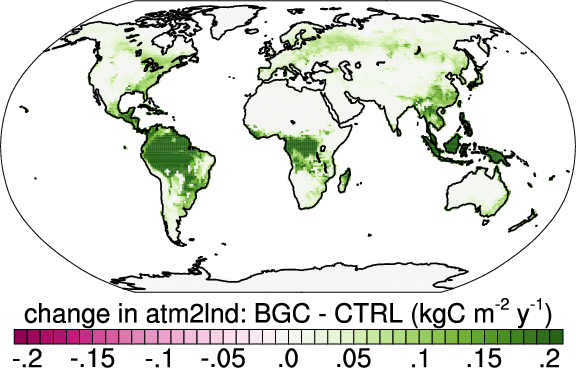

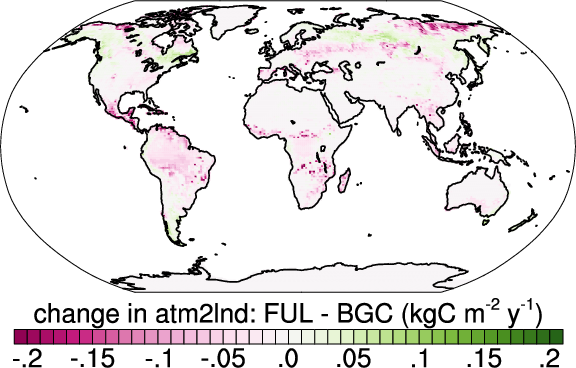

In [12]:
### make maps of the change in atm2lnd between (bgc - ctrl) and (ful - bgc)

map_funcs.fill((atm2lnd_bgc_annual[years_tomap_start:years_tomap_end,:,:].mean(axis=0)-atm2lnd_ctrl_annual[years_tomap_start:years_tomap_end,:,:].mean(axis=0))* 86400.*365., lat, lon, file='delta_atm2lnd_bgc_minus_ctrl', showjupyter=True, projection='Robinson', levels=np.arange(-.2,.21,.01), colormap='MPL_PiYG', subtitle='change in atm2lnd: BGC - CTRL (kgC m~S~-2~N~ y~S~-1~N~)')

map_funcs.fill((atm2lnd_ful_annual[years_tomap_start:years_tomap_end,:,:].mean(axis=0)-atm2lnd_bgc_annual[years_tomap_start:years_tomap_end,:,:].mean(axis=0))* 86400.*365., lat, lon, file='delta_atm2lnd_ful_minus_bgc', showjupyter=True, projection='Robinson', levels=np.arange(-.2,.21,.01), colormap='MPL_PiYG', subtitle='change in atm2lnd: FUL - BGC (kgC m~S~-2~N~ y~S~-1~N~)')



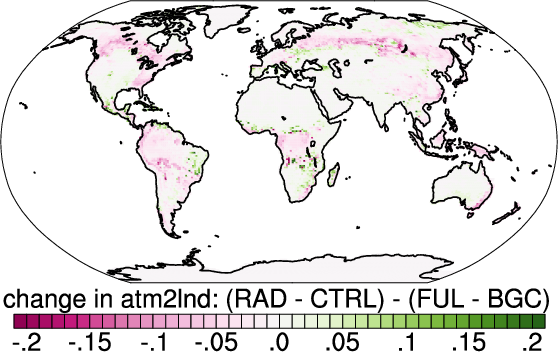

In [13]:
### make a map of the differences in possible ways of calculatihng gamma
map_funcs.fill(((atm2lnd_rad_annual[years_tomap_start:years_tomap_end,:,:].mean(axis=0)-atm2lnd_ctrl_annual[years_tomap_start:years_tomap_end,:,:].mean(axis=0)) - (atm2lnd_ful_annual[years_tomap_start:years_tomap_end,:,:].mean(axis=0)-atm2lnd_bgc_annual[years_tomap_start:years_tomap_end,:,:].mean(axis=0)))* 86400.*365., lat, lon, file='delta_atm2lnd_radminuscotrl_minus_fulminusbgc', showjupyter=True, projection='Robinson', levels=np.arange(-.2,.21,.01), colormap='MPL_PiYG', subtitle='change in atm2lnd: (RAD - CTRL) - (FUL - BGC) ')



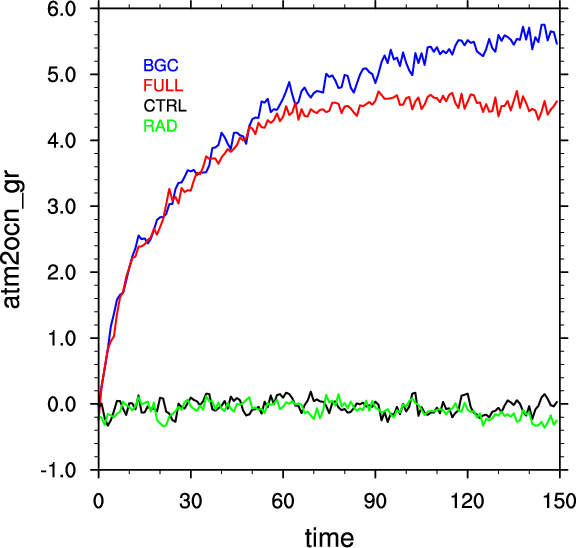

In [14]:
atm2ocn_grfilenames = [
['fgco2_Omon_CESM2_1pctCO2-bgc_r1i1p1f1_gr_000101-005012.nc',
'fgco2_Omon_CESM2_1pctCO2-bgc_r1i1p1f1_gr_005101-010012.nc',
'fgco2_Omon_CESM2_1pctCO2-bgc_r1i1p1f1_gr_010101-015012.nc'],
['fgco2_Omon_CESM2_1pctCO2_r1i1p1f1_gr_000101-005012.nc',
'fgco2_Omon_CESM2_1pctCO2_r1i1p1f1_gr_005101-010012.nc',
'fgco2_Omon_CESM2_1pctCO2_r1i1p1f1_gr_010101-015012.nc'],
['fgco2_Omon_CESM2_piControl_r1i1p1f1_gr_050001-059912.nc',
'fgco2_Omon_CESM2_piControl_r1i1p1f1_gr_060001-069912.nc'],
['fgco2_Omon_CESM2_1pctco2-rad_r1i1p1f1_gr_000101-005012.nc',
'fgco2_Omon_CESM2_1pctco2-rad_r1i1p1f1_gr_005101-010012.nc',
'fgco2_Omon_CESM2_1pctco2-rad_r1i1p1f1_gr_010101-015012.nc']
]

atm2ocn_grfiles_bgc=[]
for i in range(len(atm2ocn_grfilenames[0])):
    atm2ocn_grfiles_bgc.append(nc4.Dataset(atm2ocn_grfilenames[0][i]))

atm2ocn_grfiles_ful=[]
for i in range(len(atm2ocn_grfilenames[1])):
    atm2ocn_grfiles_ful.append(nc4.Dataset(atm2ocn_grfilenames[1][i]))

atm2ocn_grfiles_ctrl=[]
for i in range(len(atm2ocn_grfilenames[2])):
    atm2ocn_grfiles_ctrl.append(nc4.Dataset(atm2ocn_grfilenames[2][i]))

atm2ocn_grfiles_rad=[]
for i in range(len(atm2ocn_grfilenames[3])):
    atm2ocn_grfiles_rad.append(nc4.Dataset(atm2ocn_grfilenames[3][i]))


atm2ocn_gr_bgc = np.ma.row_stack((atm2ocn_grfiles_bgc[0].variables['fgco2'][:],atm2ocn_grfiles_bgc[1].variables['fgco2'][:],atm2ocn_grfiles_bgc[2].variables['fgco2'][:]))
atm2ocn_gr_bgc_annual = smoothlib.monthly_to_annual(atm2ocn_gr_bgc)
atm2ocn_gr_bgc_global_annual = geog_funcs.area_integrate(atm2ocn_gr_bgc_annual, lat_ocn_gr, lon_ocn_gr, area=area_ocn_gr)  * 86400.*365. / 1e12

atm2ocn_gr_ful = np.ma.row_stack((atm2ocn_grfiles_ful[0].variables['fgco2'][:],atm2ocn_grfiles_ful[1].variables['fgco2'][:],atm2ocn_grfiles_ful[2].variables['fgco2'][:]))
atm2ocn_gr_ful_annual = smoothlib.monthly_to_annual(atm2ocn_gr_ful)
atm2ocn_gr_ful_global_annual = geog_funcs.area_integrate(atm2ocn_gr_ful_annual, lat_ocn_gr, lon_ocn_gr, area=area_ocn_gr) * 86400.*365. / 1e12

atm2ocn_gr_rad = np.ma.row_stack((atm2ocn_grfiles_rad[0].variables['fgco2'][:],atm2ocn_grfiles_rad[1].variables['fgco2'][:],atm2ocn_grfiles_rad[2].variables['fgco2'][:]))
atm2ocn_gr_rad_annual = smoothlib.monthly_to_annual(atm2ocn_gr_rad)
atm2ocn_gr_rad_global_annual = geog_funcs.area_integrate(atm2ocn_gr_rad_annual, lat_ocn_gr, lon_ocn_gr, area=area_ocn_gr) * 86400.*365. / 1e12

atm2ocn_gr_ctrl = np.ma.row_stack((atm2ocn_grfiles_ctrl[0].variables['fgco2'][:],atm2ocn_grfiles_ctrl[1].variables['fgco2'][:]))
atm2ocn_gr_ctrl_annual = smoothlib.monthly_to_annual(atm2ocn_gr_ctrl)
atm2ocn_gr_ctrl_global_annual = geog_funcs.area_integrate(atm2ocn_gr_ctrl_annual, lat_ocn_gr, lon_ocn_gr, area=area_ocn_gr) * 86400.*365. / 1e12

map_funcs.xyplot(np.arange(len(atm2ocn_gr_ful_global_annual)), np.row_stack((atm2ocn_gr_bgc_global_annual,atm2ocn_gr_ful_global_annual,atm2ocn_gr_ctrl_global_annual[0:150],atm2ocn_gr_rad_global_annual)), file='c4mip_atm2ocn_gr_global', ytitle='atm2ocn_gr', xtitle='time', showjupyter=True, colors=['blue','red','black','green'], labels=['BGC','FULL','CTRL','RAD'])



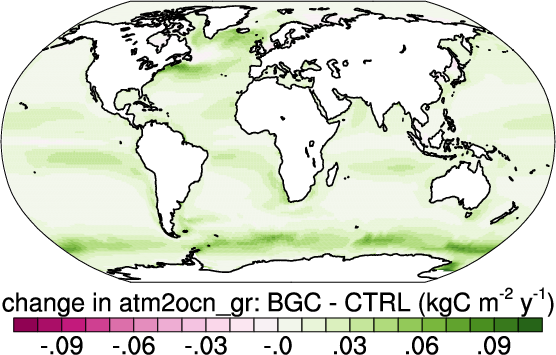

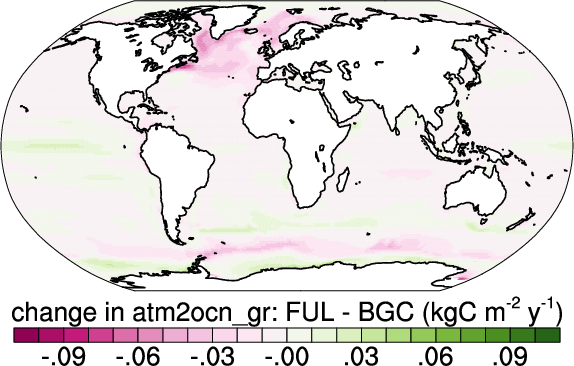

In [15]:
## show maps of the change in atm2ocn flux

map_funcs.fill((atm2ocn_gr_bgc_annual[years_tomap_start:years_tomap_end,:,:].mean(axis=0)-atm2ocn_gr_ctrl_annual[years_tomap_start:years_tomap_end,:,:].mean(axis=0))* 86400.*365., lat_ocn_gr, lon_ocn_gr, file='delta_atm2ocn_gr_bgc_minus_ctrl', showjupyter=True, projection='Robinson', levels=np.arange(-.1,.11,.01), colormap='MPL_PiYG', subtitle='change in atm2ocn_gr: BGC - CTRL (kgC m~S~-2~N~ y~S~-1~N~)')

map_funcs.fill((atm2ocn_gr_ful_annual[years_tomap_start:years_tomap_end,:,:].mean(axis=0)-atm2ocn_gr_bgc_annual[years_tomap_start:years_tomap_end,:,:].mean(axis=0))* 86400.*365., lat_ocn_gr, lon_ocn_gr, file='delta_atm2ocn_gr_ful_minus_bgc', showjupyter=True, projection='Robinson', levels=np.arange(-.1,.11,.01), colormap='MPL_PiYG', subtitle='change in atm2ocn_gr: FUL - BGC (kgC m~S~-2~N~ y~S~-1~N~)')



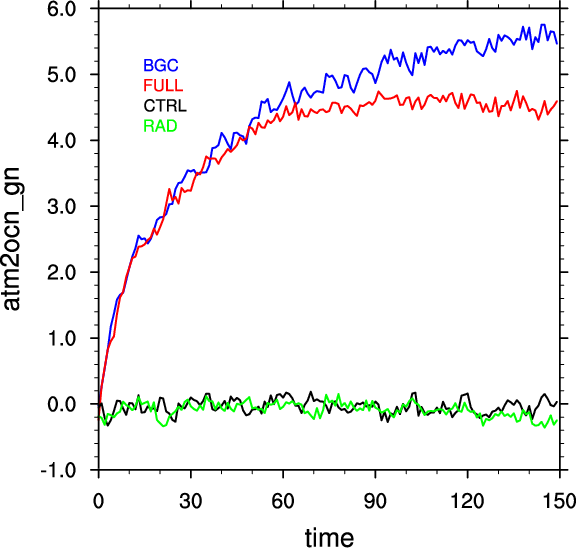

In [16]:
atm2ocn_gnfilenames = [
['fgco2_Omon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_000101-005012.nc',
'fgco2_Omon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_005101-010012.nc',
'fgco2_Omon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_010101-015012.nc'],
['fgco2_Omon_CESM2_1pctCO2_r1i1p1f1_gn_000101-005012.nc',
'fgco2_Omon_CESM2_1pctCO2_r1i1p1f1_gn_005101-010012.nc',
'fgco2_Omon_CESM2_1pctCO2_r1i1p1f1_gn_010101-015012.nc'],
['fgco2_Omon_CESM2_piControl_r1i1p1f1_gn_050001-059912.nc',
'fgco2_Omon_CESM2_piControl_r1i1p1f1_gn_060001-069912.nc'],
['fgco2_Omon_CESM2_1pctco2-rad_r1i1p1f1_gn_000101-005012.nc',
'fgco2_Omon_CESM2_1pctco2-rad_r1i1p1f1_gn_005101-010012.nc',
'fgco2_Omon_CESM2_1pctco2-rad_r1i1p1f1_gn_010101-015012.nc']
]

atm2ocn_gnfiles_bgc=[]
for i in range(len(atm2ocn_gnfilenames[0])):
    atm2ocn_gnfiles_bgc.append(nc4.Dataset(atm2ocn_gnfilenames[0][i]))

atm2ocn_gnfiles_ful=[]
for i in range(len(atm2ocn_gnfilenames[1])):
    atm2ocn_gnfiles_ful.append(nc4.Dataset(atm2ocn_gnfilenames[1][i]))

atm2ocn_gnfiles_rad=[]
for i in range(len(atm2ocn_gnfilenames[3])):
    atm2ocn_gnfiles_rad.append(nc4.Dataset(atm2ocn_gnfilenames[3][i]))

atm2ocn_gnfiles_ctrl=[]
for i in range(len(atm2ocn_gnfilenames[2])):
    atm2ocn_gnfiles_ctrl.append(nc4.Dataset(atm2ocn_gnfilenames[2][i]))


atm2ocn_gn_bgc = np.ma.row_stack((atm2ocn_gnfiles_bgc[0].variables['fgco2'][:],atm2ocn_gnfiles_bgc[1].variables['fgco2'][:],atm2ocn_gnfiles_bgc[2].variables['fgco2'][:]))
atm2ocn_gn_bgc_annual = smoothlib.monthly_to_annual(atm2ocn_gn_bgc)
atm2ocn_gn_bgc_global_annual = geog_funcs.area_integrate(atm2ocn_gn_bgc_annual, None, None, area=area_ocn_gn)  * 86400.*365. / 1e12

atm2ocn_gn_ful = np.ma.row_stack((atm2ocn_gnfiles_ful[0].variables['fgco2'][:],atm2ocn_gnfiles_ful[1].variables['fgco2'][:],atm2ocn_gnfiles_ful[2].variables['fgco2'][:]))
atm2ocn_gn_ful_annual = smoothlib.monthly_to_annual(atm2ocn_gn_ful)
atm2ocn_gn_ful_global_annual = geog_funcs.area_integrate(atm2ocn_gn_ful_annual, None, None, area=area_ocn_gn) * 86400.*365. / 1e12

atm2ocn_gn_rad = np.ma.row_stack((atm2ocn_gnfiles_rad[0].variables['fgco2'][:],atm2ocn_gnfiles_rad[1].variables['fgco2'][:],atm2ocn_gnfiles_rad[2].variables['fgco2'][:]))
atm2ocn_gn_rad_annual = smoothlib.monthly_to_annual(atm2ocn_gn_rad)
atm2ocn_gn_rad_global_annual = geog_funcs.area_integrate(atm2ocn_gn_rad_annual, None, None, area=area_ocn_gn) * 86400.*365. / 1e12

atm2ocn_gn_ctrl = np.ma.row_stack((atm2ocn_gnfiles_ctrl[0].variables['fgco2'][:],atm2ocn_gnfiles_ctrl[1].variables['fgco2'][:]))
atm2ocn_gn_ctrl_annual = smoothlib.monthly_to_annual(atm2ocn_gn_ctrl)
atm2ocn_gn_ctrl_global_annual = geog_funcs.area_integrate(atm2ocn_gn_ctrl_annual, None, None, area=area_ocn_gn) * 86400.*365. / 1e12

map_funcs.xyplot(np.arange(len(atm2ocn_gn_ful_global_annual)), np.row_stack((atm2ocn_gn_bgc_global_annual,atm2ocn_gn_ful_global_annual,atm2ocn_gn_ctrl_global_annual[0:150],atm2ocn_gn_rad_global_annual)), file='c4mip_atm2ocn_gn_global', ytitle='atm2ocn_gn', xtitle='time', showjupyter=True, colors=['blue','red','black','green'], labels=['BGC','FULL','CTRL','RAD'])



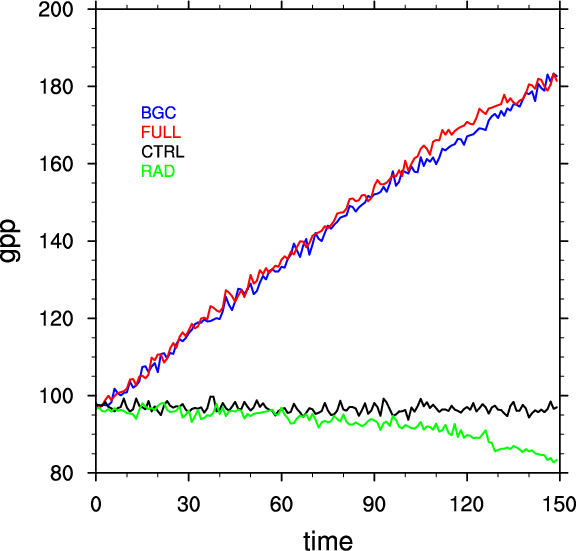

In [17]:
gppfilenames = [
['gpp_Lmon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_000101-005012.nc',
'gpp_Lmon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_005101-010012.nc',
'gpp_Lmon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_010101-015012.nc'],
['gpp_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_000101-005012.nc',
'gpp_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_005101-010012.nc',
'gpp_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_010101-015012.nc'],
['gpp_Lmon_CESM2_piControl_r1i1p1f1_gn_050001-059912.nc',
'gpp_Lmon_CESM2_piControl_r1i1p1f1_gn_060001-069912.nc'],
['gpp_Lmon_CESM2_1pctco2-rad_r1i1p1f1_gn_000101-005012.nc',
'gpp_Lmon_CESM2_1pctco2-rad_r1i1p1f1_gn_005101-010012.nc',
'gpp_Lmon_CESM2_1pctco2-rad_r1i1p1f1_gn_010101-015012.nc']
]

gppfiles_bgc=[]
for i in range(len(gppfilenames[0])):
    gppfiles_bgc.append(nc4.Dataset(gppfilenames[0][i]))

gppfiles_ful=[]
for i in range(len(gppfilenames[1])):
    gppfiles_ful.append(nc4.Dataset(gppfilenames[1][i]))

gppfiles_rad=[]
for i in range(len(gppfilenames[3])):
    gppfiles_rad.append(nc4.Dataset(gppfilenames[3][i]))

gppfiles_ctrl=[]
for i in range(len(gppfilenames[2])):
    gppfiles_ctrl.append(nc4.Dataset(gppfilenames[2][i]))

gpp_bgc = np.ma.row_stack((gppfiles_bgc[0].variables['gpp'][:],gppfiles_bgc[1].variables['gpp'][:],gppfiles_bgc[2].variables['gpp'][:]))
gpp_bgc_annual = smoothlib.monthly_to_annual(gpp_bgc)
gpp_bgc_global_annual = geog_funcs.area_integrate(gpp_bgc_annual, lat, lon, area=area_landonly_vegpresent)  * 86400.*365. / 1e12

gpp_ful = np.ma.row_stack((gppfiles_ful[0].variables['gpp'][:],gppfiles_ful[1].variables['gpp'][:],gppfiles_ful[2].variables['gpp'][:]))
gpp_ful_annual = smoothlib.monthly_to_annual(gpp_ful)
gpp_ful_global_annual = geog_funcs.area_integrate(gpp_ful_annual, lat, lon, area=area_landonly_vegpresent) * 86400.*365. / 1e12

gpp_rad = np.ma.row_stack((gppfiles_rad[0].variables['gpp'][:],gppfiles_rad[1].variables['gpp'][:],gppfiles_rad[2].variables['gpp'][:]))
gpp_rad_annual = smoothlib.monthly_to_annual(gpp_rad)
gpp_rad_global_annual = geog_funcs.area_integrate(gpp_rad_annual, lat, lon, area=area_landonly_vegpresent) * 86400.*365. / 1e12

gpp_ctrl = np.ma.row_stack((gppfiles_ctrl[0].variables['gpp'][:],gppfiles_ctrl[1].variables['gpp'][:]))
gpp_ctrl_annual = smoothlib.monthly_to_annual(gpp_ctrl)
gpp_ctrl_global_annual = geog_funcs.area_integrate(gpp_ctrl_annual, lat, lon, area=area_landonly_vegpresent) * 86400.*365. / 1e12

map_funcs.xyplot(np.arange(len(gpp_ful_global_annual)), np.row_stack((gpp_bgc_global_annual,gpp_ful_global_annual,gpp_ctrl_global_annual[0:150],gpp_rad_global_annual)), file='c4mip_gpp_global', ytitle='gpp', xtitle='time', showjupyter=True, colors=['blue','red','black','green'], labels=['BGC','FULL','CTRL','RAD'])



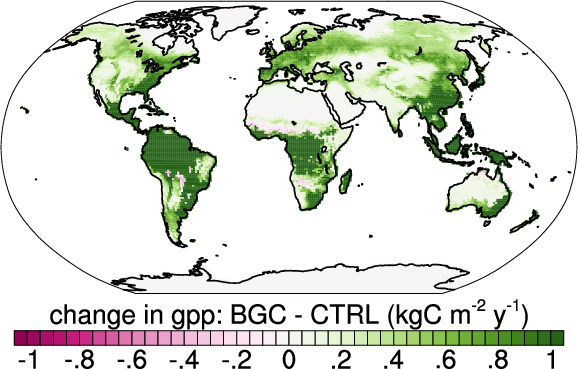

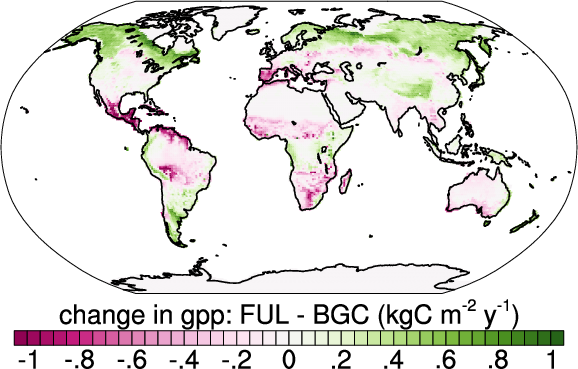

In [18]:
### make maps of the change in gpp between (bgc - ctrl) and (ful - bgc)

map_funcs.fill((gpp_bgc_annual[years_tomap_start:years_tomap_end,:,:].mean(axis=0)-gpp_ctrl_annual[years_tomap_start:years_tomap_end,:,:].mean(axis=0))* 86400.*365., lat, lon, file='delta_gpp_bgc_minus_ctrl', showjupyter=True, projection='Robinson', levels=np.arange(-1,1.05,.05), colormap='MPL_PiYG', subtitle='change in gpp: BGC - CTRL (kgC m~S~-2~N~ y~S~-1~N~)')

map_funcs.fill((gpp_ful_annual[years_tomap_start:years_tomap_end,:,:].mean(axis=0)-gpp_bgc_annual[years_tomap_start:years_tomap_end,:,:].mean(axis=0))* 86400.*365., lat, lon, file='delta_gpp_ful_minus_bgc', showjupyter=True, projection='Robinson', levels=np.arange(-1,1.05,.05), colormap='MPL_PiYG', subtitle='change in gpp: FUL - BGC (kgC m~S~-2~N~ y~S~-1~N~)')



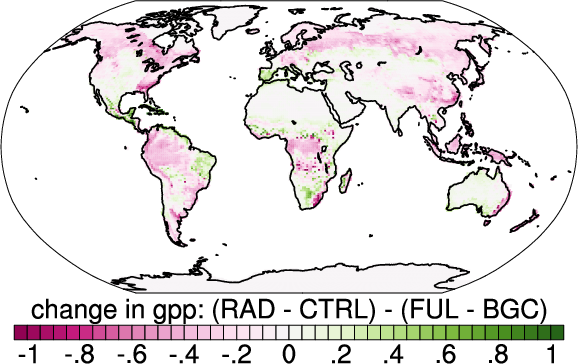

In [19]:
### make a map of the differences in possible ways of calculating gamma
map_funcs.fill(((gpp_rad_annual[years_tomap_start:years_tomap_end,:,:].mean(axis=0)-gpp_ctrl_annual[years_tomap_start:years_tomap_end,:,:].mean(axis=0)) - (gpp_ful_annual[years_tomap_start:years_tomap_end,:,:].mean(axis=0)-gpp_bgc_annual[years_tomap_start:years_tomap_end,:,:].mean(axis=0)))* 86400.*365., lat, lon, file='delta_gpp_radminuscotrl_minus_fulminusbgc', showjupyter=True, projection='Robinson', levels=np.arange(-1,1.05,.05), colormap='MPL_PiYG', subtitle='change in gpp: (RAD - CTRL) - (FUL - BGC)')


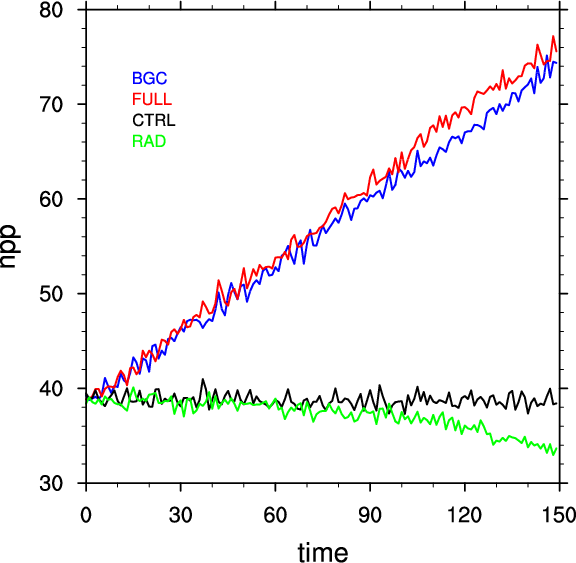

In [20]:
nppfilenames = [
['npp_Lmon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_000101-005012.nc',
'npp_Lmon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_005101-010012.nc',
'npp_Lmon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_010101-015012.nc'],
['npp_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_000101-005012.nc',
'npp_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_005101-010012.nc',
'npp_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_010101-015012.nc'],
['npp_Lmon_CESM2_piControl_r1i1p1f1_gn_050001-059912.nc',
'npp_Lmon_CESM2_piControl_r1i1p1f1_gn_060001-069912.nc'],
['npp_Lmon_CESM2_1pctco2-rad_r1i1p1f1_gn_000101-005012.nc',
'npp_Lmon_CESM2_1pctco2-rad_r1i1p1f1_gn_005101-010012.nc',
'npp_Lmon_CESM2_1pctco2-rad_r1i1p1f1_gn_010101-015012.nc']
]

nppfiles_bgc=[]
for i in range(len(nppfilenames[0])):
    nppfiles_bgc.append(nc4.Dataset(nppfilenames[0][i]))

nppfiles_ful=[]
for i in range(len(nppfilenames[1])):
    nppfiles_ful.append(nc4.Dataset(nppfilenames[1][i]))

nppfiles_rad=[]
for i in range(len(nppfilenames[3])):
    nppfiles_rad.append(nc4.Dataset(nppfilenames[3][i]))

nppfiles_ctrl=[]
for i in range(len(nppfilenames[2])):
    nppfiles_ctrl.append(nc4.Dataset(nppfilenames[2][i]))

npp_bgc = np.ma.row_stack((nppfiles_bgc[0].variables['npp'][:],nppfiles_bgc[1].variables['npp'][:],nppfiles_bgc[2].variables['npp'][:]))
npp_bgc_annual = smoothlib.monthly_to_annual(npp_bgc)
npp_bgc_global_annual = geog_funcs.area_integrate(npp_bgc_annual, lat, lon, area=area_landonly_vegpresent)  * 86400.*365. / 1e12

npp_ful = np.ma.row_stack((nppfiles_ful[0].variables['npp'][:],nppfiles_ful[1].variables['npp'][:],nppfiles_ful[2].variables['npp'][:]))
npp_ful_annual = smoothlib.monthly_to_annual(npp_ful)
npp_ful_global_annual = geog_funcs.area_integrate(npp_ful_annual, lat, lon, area=area_landonly_vegpresent) * 86400.*365. / 1e12

npp_rad = np.ma.row_stack((nppfiles_rad[0].variables['npp'][:],nppfiles_rad[1].variables['npp'][:],nppfiles_rad[2].variables['npp'][:]))
npp_rad_annual = smoothlib.monthly_to_annual(npp_rad)
npp_rad_global_annual = geog_funcs.area_integrate(npp_rad_annual, lat, lon, area=area_landonly_vegpresent) * 86400.*365. / 1e12

npp_ctrl = np.ma.row_stack((nppfiles_ctrl[0].variables['npp'][:],nppfiles_ctrl[1].variables['npp'][:]))
npp_ctrl_annual = smoothlib.monthly_to_annual(npp_ctrl)
npp_ctrl_global_annual = geog_funcs.area_integrate(npp_ctrl_annual, lat, lon, area=area_landonly_vegpresent) * 86400.*365. / 1e12

map_funcs.xyplot(np.arange(len(npp_ful_global_annual)), np.row_stack((npp_bgc_global_annual,npp_ful_global_annual,npp_ctrl_global_annual[0:150],npp_rad_global_annual)), file='c4mip_npp_global', ytitle='npp', xtitle='time', showjupyter=True, colors=['blue','red','black','green'], labels=['BGC','FULL','CTRL','RAD'])



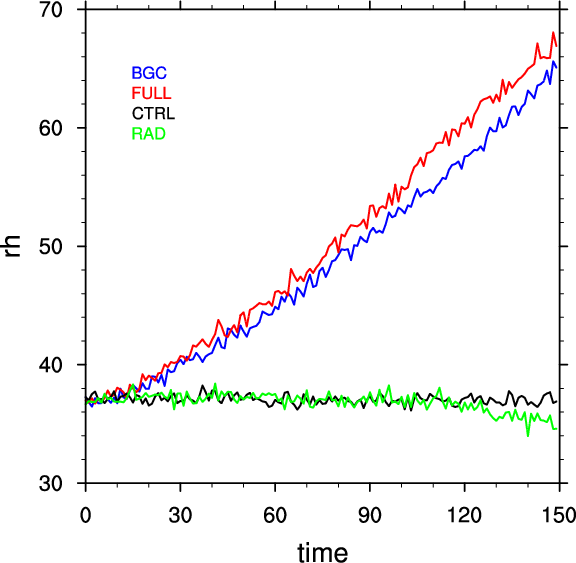

In [21]:
rhfilenames = [
['rh_Lmon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_000101-005012.nc',
'rh_Lmon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_005101-010012.nc',
'rh_Lmon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_010101-015012.nc'],
['rh_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_000101-005012.nc',
'rh_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_005101-010012.nc',
'rh_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_010101-015012.nc'],
['rh_Lmon_CESM2_piControl_r1i1p1f1_gn_050001-059912.nc',
'rh_Lmon_CESM2_piControl_r1i1p1f1_gn_060001-069912.nc'],
['rh_Lmon_CESM2_1pctco2-rad_r1i1p1f1_gn_000101-005012.nc',
'rh_Lmon_CESM2_1pctco2-rad_r1i1p1f1_gn_005101-010012.nc',
'rh_Lmon_CESM2_1pctco2-rad_r1i1p1f1_gn_010101-015012.nc']
]

rhfiles_bgc=[]
for i in range(len(rhfilenames[0])):
    rhfiles_bgc.append(nc4.Dataset(rhfilenames[0][i]))

rhfiles_ful=[]
for i in range(len(rhfilenames[1])):
    rhfiles_ful.append(nc4.Dataset(rhfilenames[1][i]))

rhfiles_rad=[]
for i in range(len(rhfilenames[3])):
    rhfiles_rad.append(nc4.Dataset(rhfilenames[3][i]))

rhfiles_ctrl=[]
for i in range(len(rhfilenames[2])):
    rhfiles_ctrl.append(nc4.Dataset(rhfilenames[2][i]))

rh_bgc = np.ma.row_stack((rhfiles_bgc[0].variables['rh'][:],rhfiles_bgc[1].variables['rh'][:],rhfiles_bgc[2].variables['rh'][:]))
rh_bgc_annual = smoothlib.monthly_to_annual(rh_bgc)
rh_bgc_global_annual = geog_funcs.area_integrate(rh_bgc_annual, lat, lon, area=area_landonly_vegpresent)  * 86400.*365. / 1e12

rh_ful = np.ma.row_stack((rhfiles_ful[0].variables['rh'][:],rhfiles_ful[1].variables['rh'][:],rhfiles_ful[2].variables['rh'][:]))
rh_ful_annual = smoothlib.monthly_to_annual(rh_ful)
rh_ful_global_annual = geog_funcs.area_integrate(rh_ful_annual, lat, lon, area=area_landonly_vegpresent) * 86400.*365. / 1e12

rh_rad = np.ma.row_stack((rhfiles_rad[0].variables['rh'][:],rhfiles_rad[1].variables['rh'][:],rhfiles_rad[2].variables['rh'][:]))
rh_rad_annual = smoothlib.monthly_to_annual(rh_rad)
rh_rad_global_annual = geog_funcs.area_integrate(rh_rad_annual, lat, lon, area=area_landonly_vegpresent) * 86400.*365. / 1e12

rh_ctrl = np.ma.row_stack((rhfiles_ctrl[0].variables['rh'][:],rhfiles_ctrl[1].variables['rh'][:]))
rh_ctrl_annual = smoothlib.monthly_to_annual(rh_ctrl)
rh_ctrl_global_annual = geog_funcs.area_integrate(rh_ctrl_annual, lat, lon, area=area_landonly_vegpresent) * 86400.*365. / 1e12

map_funcs.xyplot(np.arange(len(rh_ful_global_annual)), np.row_stack((rh_bgc_global_annual,rh_ful_global_annual,rh_ctrl_global_annual[0:150],rh_rad_global_annual)), file='c4mip_rh_global', ytitle='rh', xtitle='time', showjupyter=True, colors=['blue','red','black','green'], labels=['BGC','FULL','CTRL','RAD'])



In [22]:
data_out_bgc = np.column_stack((np.arange(150),
                                tas_bgc_global_annual,
                                co2_bgc_global_annual,
                                atm2lnd_bgc_global_annual,
                                atm2ocn_gn_bgc_global_annual,
                                gpp_bgc_global_annual,
                                npp_bgc_global_annual,
                                rh_bgc_global_annual,
                                cVeg_bgc_global_annual,
                                cSoil_bgc_global_annual
                                ))

data_out_ful = np.column_stack((np.arange(150),
                                tas_ful_global_annual,
                                co2_ful_global_annual,
                                atm2lnd_ful_global_annual,
                                atm2ocn_gn_ful_global_annual,
                                gpp_ful_global_annual,
                                npp_ful_global_annual,
                                rh_ful_global_annual,
                                cVeg_ful_global_annual,
                                cSoil_ful_global_annual
                                ))

data_out_ctrl = np.column_stack((np.arange(150),
                                tas_ctrl_global_annual[0:150],
                                co2_ctrl_global_annual[0:150],
                                atm2lnd_ctrl_global_annual[0:150],
                                atm2ocn_gn_ctrl_global_annual[0:150],
                                gpp_ctrl_global_annual[0:150],
                                npp_ctrl_global_annual[0:150],
                                rh_ctrl_global_annual[0:150],
                                cVeg_ctrl_global_annual[0:150],
                                cSoil_ctrl_global_annual[0:150]
                                ))

data_out_rad = np.column_stack((np.arange(150),
                                tas_rad_global_annual,
                                co2_rad_global_annual,
                                atm2lnd_rad_global_annual,
                                atm2ocn_gn_rad_global_annual,
                                gpp_rad_global_annual,
                                npp_rad_global_annual,
                                rh_rad_global_annual,
                                cVeg_rad_global_annual,
                                cSoil_rad_global_annual
                                ))


column_names = 'YEAR ST CO2 LA_CO2_FLUX OA_CO2_FLUX GPP NPP RH CLIVE CDEAD'

In [23]:
np.savetxt('CESM2_1pc_BGC.txt', data_out_bgc, header=column_names, delimiter=' ')
np.savetxt('CESM2_1pc_COU.txt', data_out_ful, header=column_names, delimiter=' ')
np.savetxt('CESM2_PI_CONTROL.txt', data_out_ctrl, header=column_names, delimiter=' ')
np.savetxt('CESM2_1pc_RAD.txt', data_out_rad, header=column_names, delimiter=' ')

In [24]:
### calculate beta and gamma curves

cum_atm_sink_bgc = -(atm2lnd_bgc_global_annual + atm2ocn_gn_bgc_global_annual).cumsum()
cum_atm_sink_ful = -(atm2lnd_ful_global_annual + atm2ocn_gn_ful_global_annual).cumsum()
cum_atm_sink_ctrl = -(atm2lnd_ctrl_global_annual + atm2ocn_gn_ctrl_global_annual).cumsum()[0:150]

cum_lnd_sink_bgc = (atm2lnd_bgc_global_annual).cumsum()
cum_lnd_sink_ful = (atm2lnd_ful_global_annual).cumsum()
cum_lnd_sink_ctrl = (atm2lnd_ctrl_global_annual).cumsum()[0:150]

cum_ocn_sink_bgc = (atm2ocn_gn_bgc_global_annual).cumsum()
cum_ocn_sink_ful = (atm2ocn_gn_ful_global_annual).cumsum()
cum_ocn_sink_ctrl = (atm2ocn_gn_ctrl_global_annual).cumsum()[0:150]


delta_co2 = co2_bgc_global_annual - co2_ctrl_global_annual[0:150]
delta_T = tas_ful_global_annual - tas_ctrl_global_annual[0:150]



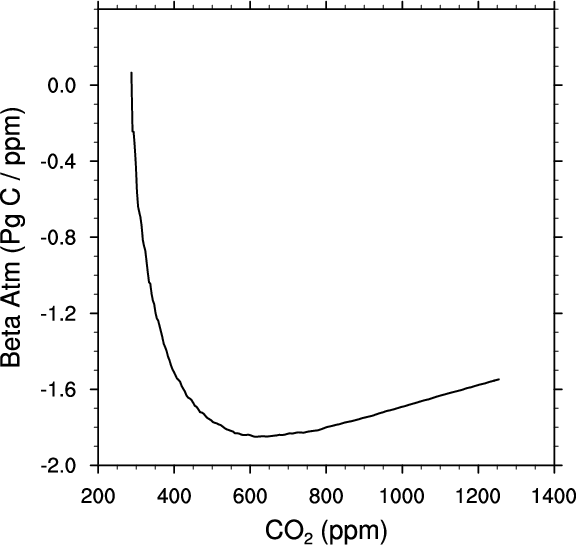

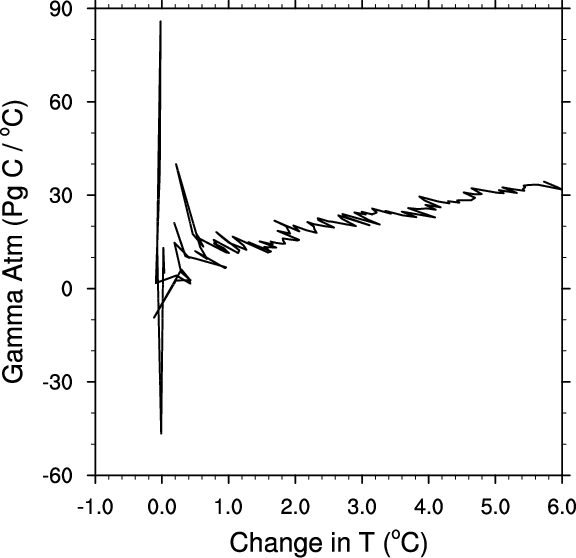

In [25]:
## plot atmospheric beta and gamma curves
map_funcs.xyplot(co2_bgc_global_annual, (cum_atm_sink_bgc-cum_atm_sink_ctrl)/delta_co2, file='beta_atm_plot', showjupyter=True, xtitle='CO~B~2~N~ (ppm)', ytitle='Beta Atm (Pg C / ppm)')
map_funcs.xyplot(delta_T, (cum_atm_sink_ful-cum_atm_sink_bgc)/delta_T, file='gamma_atm_plot', showjupyter=True, xtitle='Change in T (~S~o~N~C)', ytitle='Gamma Atm (Pg C / ~S~o~N~C)')


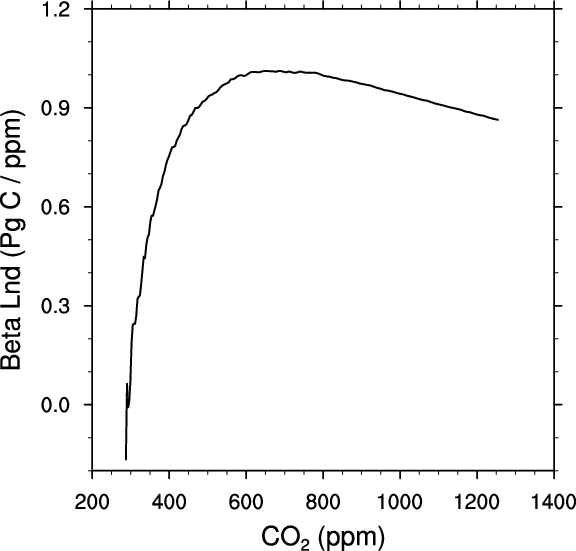

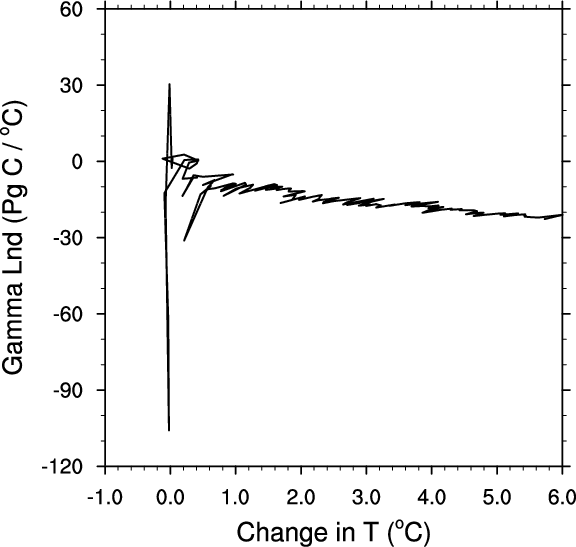

In [26]:
## plot land beta and gamm curves
map_funcs.xyplot(co2_bgc_global_annual, (cum_lnd_sink_bgc-cum_lnd_sink_ctrl)/delta_co2, file='beta_lnd_plot', showjupyter=True, xtitle='CO~B~2~N~ (ppm)', ytitle='Beta Lnd (Pg C / ppm)')
map_funcs.xyplot(delta_T, (cum_lnd_sink_ful-cum_lnd_sink_bgc)/delta_T, file='gamma_lnd_plot', showjupyter=True, xtitle='Change in T (~S~o~N~C)', ytitle='Gamma Lnd (Pg C / ~S~o~N~C)')


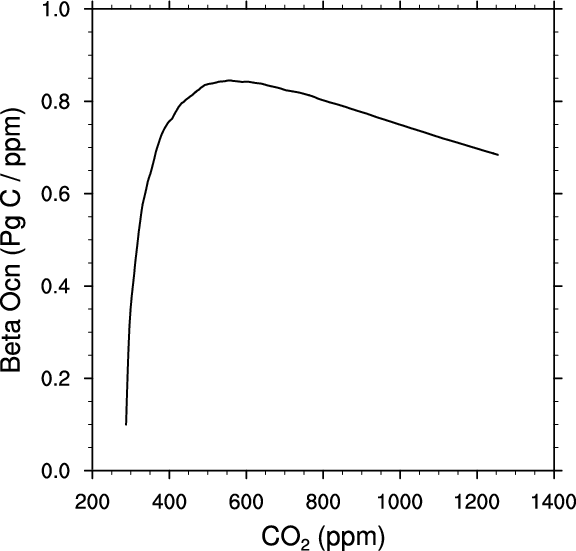

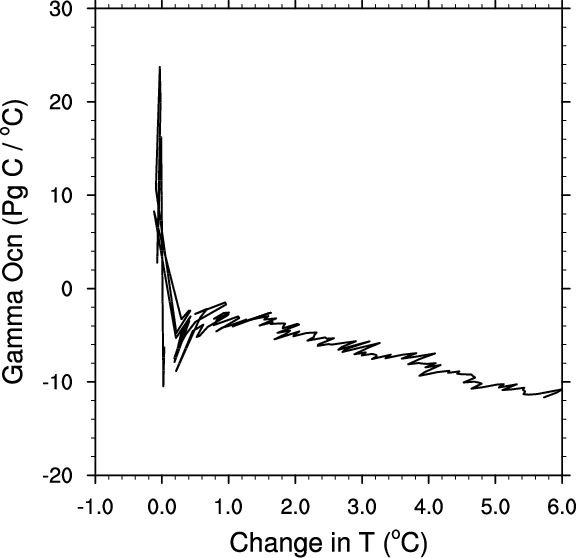

In [27]:
## plot ocean beta and gamm curves
map_funcs.xyplot(co2_bgc_global_annual, (cum_ocn_sink_bgc-cum_ocn_sink_ctrl)/delta_co2, file='beta_ocn_plot', showjupyter=True, xtitle='CO~B~2~N~ (ppm)', ytitle='Beta Ocn (Pg C / ppm)')
map_funcs.xyplot(delta_T, (cum_ocn_sink_ful-cum_ocn_sink_bgc)/delta_T, file='gamma_ocn_plot', showjupyter=True, xtitle='Change in T (~S~o~N~C)', ytitle='Gamma Ocn (Pg C / ~S~o~N~C)')


In [28]:
### check for conservation of carbon on the land.
print(cum_lnd_sink_bgc[-1])
print((cSoil_bgc_global_annual+cVeg_bgc_global_annual)[-1]-(cSoil_bgc_global_annual+cVeg_bgc_global_annual)[0])

print(cum_lnd_sink_ful[-1])
print((cSoil_ful_global_annual+cVeg_ful_global_annual)[-1]-(cSoil_ful_global_annual+cVeg_ful_global_annual)[0])

print(cum_lnd_sink_ctrl[-1])
print((cSoil_ctrl_global_annual+cVeg_ctrl_global_annual)[-1]-(cSoil_ctrl_global_annual+cVeg_ctrl_global_annual)[0])



832.6295290479432
831.6115259684152
702.6517190308757
704.7827274063075
-4.390085998281422
-5.951838222982133


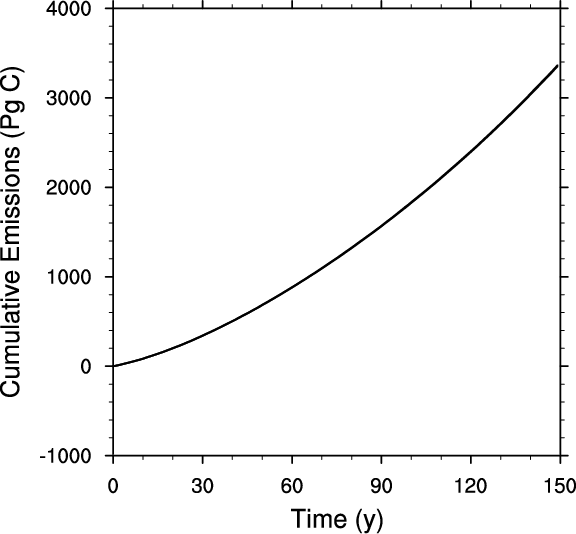

66
66


In [29]:
### calculate the diagnosed emissions timeseries
ppm_to_pgc = 2.124  # from le quere 2018, which gets it from ballantyne et al 2012

cum_atm_sink = (co2_ful_global_annual - co2_bgc_global_annual[0])*ppm_to_pgc

cum_emissions = cum_atm_sink + cum_lnd_sink_ful + cum_ocn_sink_ful

cum_emissions_nodrift = cum_atm_sink + cum_lnd_sink_ful - cum_lnd_sink_ctrl + cum_ocn_sink_ful - cum_ocn_sink_ctrl

map_funcs.xyplot(np.arange(150), np.row_stack((cum_emissions,cum_emissions_nodrift)), file='cum_emissions', showjupyter=True, xtitle='Time (y)', ytitle='Cumulative Emissions (Pg C)')

year_1000pg_nodrift = np.argmin(np.abs(cum_emissions_nodrift - 1000.))

print(year_1000pg_nodrift)

year_1000pg = np.argmin(np.abs(cum_emissions - 1000.))

print(year_1000pg)


#year_4xco2 = np.argmin(np.abs(co2_ful_global_annual - 4.*co2_ful_global_annual[0]))
#print(year_4xco2)

#year_2xco2 = np.argmin(np.abs(co2_ful_global_annual - 2.*co2_ful_global_annual[0]))
#print(year_2xco2)

#print(cum_atm_sink[year_4xco2])
